<a href="https://colab.research.google.com/github/BarryDeCicco/ASA_SAS_to_Python_AI_2025_08_29/blob/main/Ann_Arbor_ASA_SAS_Python_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# This notebook demonstrates how to translate SAS code to Python code using AI.  It will be given at the April, 2025 Meeting of the Ann Arbor Chapter of the American Statistical Association


## Software Used in this presentation:

-   [ChatGPT version 4.0](https://chatgpt.com)

-   [ClaudeAI](https://claude.ai "https://claude.ai")

-   [CodeConvert](https://app.codeconvert.ai/)

-   [DeepSeek](https://chat.deepseek.com/)

## My Experience


-   Has mainly been in SAS =\> Python/PySpark/Pandas

-   Conversion by 'paragraph' (small block) is 90% correct.

-   This means that converting a large block of code will result in code with multiple errors, and that you will have to go back to converting in short chunks.

-   It also means the some more complicated expressions in SAS (not particularly long ones) can result in very long and very complicated/nested blocks of Python code, for which debugging is difficult.

-   PySpark is a distributed system, which I've found the most difficulty with (e.g., it doesn't like row-by-row operations).  Also, I don't have access to that now, so will not cover that here.


## First Conversion - Simple SAS Code:

This sets up a data set, inputs the values, calculates a chi-squared value and print the results.

data chisq;
input df;
chirat = cinv(.995,df)/cinv(.005,df);

datalines; 20 21 22 23 24 25 26 27 28 29 30 ;

run;

proc print data=chisq; var df chirat;

run;



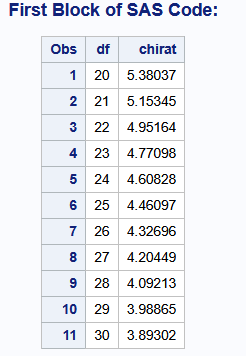

# The prompt for all four was:
Translate this from SAS to Python:

data chisq;
input df;
chirat = cinv(.995,df)/cinv(.005,df);
datalines;
20
21
22
23
24
25
26
27
28
29
30
;
run;

proc print data=chisq;
var df chirat;
run;


# ChatGPT Result

In [ ]:
import pandas as pd
from scipy.stats import chi2

# Define the data
df_list = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Create a DataFrame
chisq = pd.DataFrame({'df': df_list})

# Calculate 'chirat'
chisq['chirat'] = chi2.ppf(0.995, chisq['df']) / chi2.ppf(0.005, chisq['df'])

# Display the result
print(chisq[['df', 'chirat']])


    df    chirat
0   20  5.380372
1   21  5.153454
2   22  4.951644
3   23  4.770977
4   24  4.608278
5   25  4.460974
6   26  4.326958
7   27  4.204493
8   28  4.092128
9   29  3.988646
10  30  3.893019


**The first time I ran this, I had a stray fragment, 'text goes here'.  This affected the code, with pandas not being imported.  The code crashed.**


# Claude AI

When I was preparing this, ClaudeAI got into a loop, and refused to restart.<p>

The next day, it worked.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Create list of degrees of freedom
df_values = list(range(20, 31))

# Calculate the ratio of chi-square values
chirat_values = [stats.chi2.ppf(0.995, df) / stats.chi2.ppf(0.005, df) for df in df_values]

# Create a dataframe
chisq_df = pd.DataFrame({
    'df': df_values,
    'chirat': chirat_values
})

# Display the results
print(chisq_df)

    df    chirat
0   20  5.380372
1   21  5.153454
2   22  4.951644
3   23  4.770977
4   24  4.608278
5   25  4.460974
6   26  4.326958
7   27  4.204493
8   28  4.092128
9   29  3.988646
10  30  3.893019



# Code Convert:  Online SAS to Python Converter

(https://www.codeconvert.ai/sas-to-python-converter)

In [ ]:
import pandas as pd
from scipy.stats import chi2

# Create a DataFrame to hold the data
data = {
    'df': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
}

chisq = pd.DataFrame(data)

# Calculate chirat
chisq['chirat'] = chi2.ppf(0.995, chisq['df']) / chi2.ppf(0.005, chisq['df'])

# Print the DataFrame
print(chisq[['df', 'chirat']])

    df    chirat
0   20  5.380372
1   21  5.153454
2   22  4.951644
3   23  4.770977
4   24  4.608278
5   25  4.460974
6   26  4.326958
7   27  4.204493
8   28  4.092128
9   29  3.988646
10  30  3.893019


# Deep Seek

In [ ]:
import pandas as pd
from scipy.stats import chi2

# Create DataFrame with degrees of freedom
df_values = list(range(20, 31))  # 20 to 30 inclusive
chisq = pd.DataFrame({'df': df_values})

# Calculate chirat = chi2.ppf(0.995, df) / chi2.ppf(0.005, df)
chisq['chirat'] = chisq['df'].apply(
    lambda df: chi2.ppf(0.995, df) / chi2.ppf(0.005, df)
)

# Print the result (similar to proc print)
print(chisq[['df', 'chirat']])

    df    chirat
0   20  5.380372
1   21  5.153454
2   22  4.951644
3   23  4.770977
4   24  4.608278
5   25  4.460974
6   26  4.326958
7   27  4.204493
8   28  4.092128
9   29  3.988646
10  30  3.893019


# New Section

# Where I saw problems

# A Bit More Complex - Using a RETAIN Statement

**This tells SAS to hold values ACROSS rows**


```

 Original SAS Code:

From https://communities.sas.com/t5/SAS-Programming/Retain-with-Arrays/td-p/285278


data have;
input FFY2012;
cards;
0.0
0.2
.
0.3
0.5
0.8
;
run;

Proc print data = have;
run;


data want;
	set have;
if ffy2012 = . then ffyear2012 = 0;
	if ffy2012 ne . then ffyear2012 = ffy2012;
	retain ffyear2012;

proc print data = want;
run;
```



### Result from SAS:

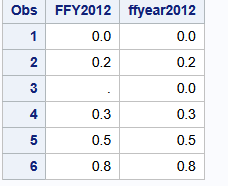

## ChatGT:

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Create the 'have' DataFrame
have = pd.DataFrame({'FFY2012': [0.0, 0.2, np.nan, 0.3, 0.5, 0.8]})

print("Original Data:")
print(have)

# Step 2: Create 'want' DataFrame with logic similar to SAS
ffyear2012 = []
current_value = 0

for val in have['FFY2012']:
    if pd.isna(val):
        ffyear2012.append(current_value)
    else:
        current_value = val
        ffyear2012.append(current_value)

have['ffyear2012'] = ffyear2012

print("\nTransformed Data:")
print(have)


Original Data:
   FFY2012
0      0.0
1      0.2
2      NaN
3      0.3
4      0.5
5      0.8

Transformed Data:
   FFY2012  ffyear2012
0      0.0         0.0
1      0.2         0.2
2      NaN         0.2
3      0.3         0.3
4      0.5         0.5
5      0.8         0.8
